In [ ]:

import torchvision
from sklearn import model_selection
from torch.utils.data import random_split
import torchvision.transforms as transforms
from sklearn import metrics
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
from sklearn import linear_model
from sklearn.metrics import accuracy_score



In [ ]:
#Creating Transform to make changes in the images 
#Here we give sizes
transform = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])


#Training Data 
X_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
print("Training Data",len(X_train))
#Spliting into validation data as well
X_train, validation_data = random_split(X_train, [40000, 10000])
y_train = torch.utils.data.DataLoader(X_train, shuffle=True, batch_size=4, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=4, shuffle=True, num_workers=2)

#Test data
X_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
y_test = torch.utils.data.DataLoader(X_test, shuffle=False,batch_size=4,  num_workers=2)




Files already downloaded and verified
Training Data 50000
Files already downloaded and verified


In [ ]:
#After Data has been splitted
#Validation
print(len(X_train))
#Test
print(len(y_train))


40000
10000


In [ ]:
#labels
labels = ('airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
print(labels)

('airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


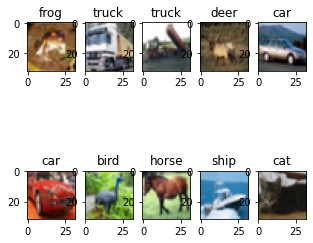

In [ ]:
# Loading data to print some images
from keras.datasets import cifar10
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()
import matplotlib.pyplot as plt
# Having first 5 images using X_train and y_Train
index1 = 0
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(5,5))
#Looping to display images
for x in range(2):
    for y in range(5):
        #To set the title/label
        axes[x,y].set_title(labels[y_train1[index1][0]])
        #To print the image
        axes[x,y].imshow(X_train1[index1])
        #For x and y axis
        axes[x,y].get_xaxis().set_visible(True)
        axes[x,y].get_yaxis().set_visible(True)
        #incrementing the index
        index1 =index1+ 1
plt.show()

In [ ]:
#Here we have Pretrained AlexNet
#Downloading it
Alexnet = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [ ]:
#Model Evaluation
#To check for the features and classifiers
Alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#To avoid overfitting and at the end we have 10 labels only
#Making changes into different layers
Alexnet.classifier[1] = nn.Linear(9216,4096)
Alexnet.classifier[4] = nn.Linear(4096,1024)
Alexnet.classifier[6] = nn.Linear(1024,10)

#Again evaluating and checking the changes
Alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Checking the current device
source = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#Printing the current device
#If it is working in GPU,it will print cuda:0 else cpu
print(source)

#Moving the input and Alexnet to GPU 
#It will speed up the process 
Alexnet.to(source)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Looking for the fully connected layers
print(Alexnet.classifier[1])
print(Alexnet.classifier[4])
print(Alexnet.classifier[6])

Linear(in_features=9216, out_features=4096, bias=True)
Linear(in_features=4096, out_features=1024, bias=True)
Linear(in_features=1024, out_features=10, bias=True)


In [ ]:
#Now finding optimizer and loss
#Passing the momentum and learning rate as lr
opti = optim.SGD(Alexnet.parameters(), lr=0.001, momentum=0.9)
#Loss
cr_loss = nn.CrossEntropyLoss()

#Training the model
#Looping over the training data set with  multiple epochs
for epoch in range(6): 
    #Initiliase the loss with zero 
    loss_current = 0.0
    #Looping over training data
    for i, data in enumerate(y_train, 0):
        #Extracting the inputs as images and labels
        images, labels = data[0].to(source), data[1].to(source)
        opti.zero_grad()
        #Getting output by passing input/images to the alexnet model
        output = Alexnet(images)
        #Finding the loss by cross entropy
        loss = cr_loss(output, labels)
        loss.backward()
        opti.step()
        # Finding the loss for each epoch
        loss_current =loss_current+ loss.item()
        #Providing the condition
        if i % 2000 == 1999:  
            #Printing the Epoch and loss
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss_current / 2000))
            loss_current = 0.0



[1,  2000] loss: 1.207
[1,  4000] loss: 0.914
[1,  6000] loss: 0.799
[1,  8000] loss: 0.740
[1, 10000] loss: 0.695
[2,  2000] loss: 0.534
[2,  4000] loss: 0.552
[2,  6000] loss: 0.536
[2,  8000] loss: 0.521
[2, 10000] loss: 0.510
[3,  2000] loss: 0.349
[3,  4000] loss: 0.385
[3,  6000] loss: 0.384
[3,  8000] loss: 0.382
[3, 10000] loss: 0.377
[4,  2000] loss: 0.239
[4,  4000] loss: 0.270
[4,  6000] loss: 0.286
[4,  8000] loss: 0.288
[4, 10000] loss: 0.295
[5,  2000] loss: 0.167
[5,  4000] loss: 0.192
[5,  6000] loss: 0.214
[5,  8000] loss: 0.207
[5, 10000] loss: 0.245
[6,  2000] loss: 0.138
[6,  4000] loss: 0.144
[6,  6000] loss: 0.175
[6,  8000] loss: 0.188
[6, 10000] loss: 0.171


In [ ]:
#Now over here
#We have ALexnet classifier
#We are taking the output of the fc6 layer 
Alexnet.classifier = nn.Sequential(*list(Alexnet.classifier.children())[:-3])
#For y_train
#Looping over the y_train
for i, data in enumerate(y_train, 0):
    #Taking the input in form of images and labels
    images, labels = data[0], data[1]
    #Passing the input(images) into the predefined model(Alexnet)
    #Getting the output
    output = Alexnet(images.to(source))
    #Condition to get output and label
    if i==0:
        temp_output_training=output
        temp_label_training=labels
    #Appending output and label
    temp_output_training=torch.vstack((temp_output_training,output))
    temp_label_training=torch.cat((temp_label_training,labels))
    #After this point the cuda got out of memory
    if temp_output_training.shape[0]== 2100:
        break

#Now we need to train the linear classifier
#Taking
#Logistic Regression
log_reg=linear_model.LogisticRegression( solver='liblinear',multi_class='ovr')
#Fitting the logistic regression by getting back to cpu
log_reg.fit(temp_output_training.cpu().detach().numpy(),temp_label_training.cpu().numpy())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#For Validation loader
#Looping over the validation set
for i, data in enumerate(validation_loader, 0):
    #Taking input(iamges) and labels
    images, labels = data[0], data[1]
    #Passing the input(images) into the model
    #Getting the output
    output = Alexnet(images.to(source))
    #COndition to take output and labels
    if i==0:
        temp_output_validation=output
        temp_label_validation=labels

    #Appending them
    temp_output_validation=torch.vstack((temp_output_validation,output))
    temp_label_validation=torch.cat((temp_label_validation,labels))
    #After this point the cuda got out of memory
    if temp_output_validation.shape[0]== 400:
        break

#Finding the predictions
#By passing the value
y_predicted = log_reg.predict(temp_output_validation.cpu().detach().numpy())
#print(y_predicted)

#Finding the mathematical statistics to look for the working of it
#Recall
recall0=metrics.recall_score(temp_label_validation.cpu().numpy(), y_predicted,average='weighted')
#Precison
precision0=metrics.precision_score(temp_label_validation.cpu().numpy(), y_predicted,average='weighted')
#F1 Score
f1_score0=metrics.f1_score(temp_label_validation.cpu().numpy(), y_predicted,average='weighted')
#Accuracy
accuracy0=accuracy_score(temp_label_validation.cpu().numpy(), y_predicted)


#Now printing them
print("Validation")
print ("Recall : ", recall0)
print ("Precision : ", precision0)
print ("F1 score : ",f1_score0 )
print ("Accuracy : ", accuracy0)


Validation
Recall :  0.815
Precision :  0.8207617292617292
F1 score :  0.8152579543051717
Accuracy :  0.815


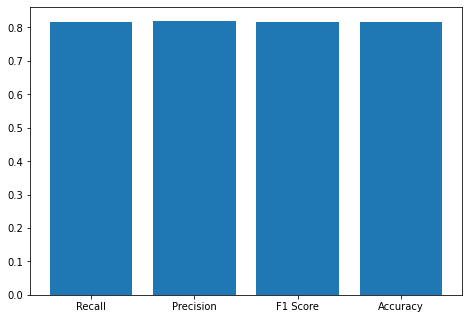

In [ ]:
#Plotting them
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Labels = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
Score = [recall0,precision0,f1_score0,accuracy0]
ax.bar(Labels,Score)
plt.show()

In [ ]:
#For Test
#Looping over the test set
for i, data in enumerate(y_test, 0):
    #Taking the input into images and labels
    images, labels = data[0], data[1]
    #Passing the images(input) to our Alexnet model
    #Finding the output from it
    output = Alexnet(images.to(source))
    #Storing the output and labels
    if i==0:
        temp_output_test=output
        temp_label_test=labels
    #Appending them
    temp_output_test=torch.vstack((temp_output_test,output))
    temp_label_test=torch.cat((temp_label_test,labels))
    #After this point the cuda got out of memory
    if temp_output_test.shape[0]== 400:
        break


#Finding the predictions
y_predicted = log_reg.predict(temp_output_test.cpu().detach().numpy())
#print(y_predicted)

#Finding the mathematical statistics to look for the working of it
#Recall
recall1=metrics.recall_score(temp_label_test.cpu().numpy(), y_predicted,average='weighted')
#Precision
precision1=metrics.precision_score(temp_label_test.cpu().numpy(), y_predicted,average='weighted')
#F1 score
f1_score1=metrics.f1_score(temp_label_test.cpu().numpy(), y_predicted,average='weighted')
#Accuracy
accuracy1=accuracy_score(temp_label_test.cpu().numpy(), y_predicted)


#Now printing them
print("Test")
print ("Recall : ", recall1)
print ("Precision : ",precison1)
print ("F1 score : ", f1_score1)
print ("Accuracy : ", accuracy1)

Test
Recall :  0.8175
Precision :  0.8239088057046915
F1 score :  0.8186488114665065
Accuracy :  0.8175


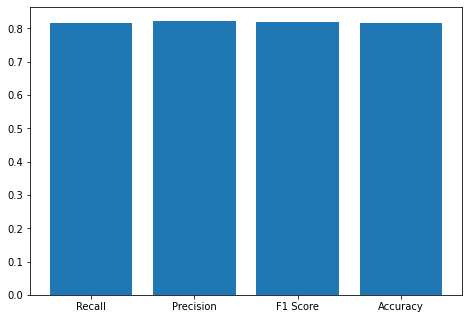

In [2]:
#Plotting them
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Labels = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
Score = [recall1,precision1,f1_score1,accuracy1]
ax.bar(Labels,Score)
plt.show()